In [1]:
import deep_lib.model_structure as dl
import deep_lib.plot_utils as dlu
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
import ipywidgets as wg

from scipy import ndimage
from deep_lib.model_parameters import Hyperparameters, xavier_initializer, zero_initializer, he_initializer

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Logging configuration from file ../logging.yaml:
{'disable_existing_loggers': False,
 'formatters': {'simple': {'format': '%(asctime)s - %(name)s - %(levelname)s - '
                                     '%(message)s'}},
 'handlers': {'console': {'class': 'logging.StreamHandler',
                          'formatter': 'simple',
                          'level': 'DEBUG',
                          'stream': 'ext://sys.stdout'},
              'error_file_handler': {'backupCount': 20,
                                     'class': 'logging.handlers.RotatingFileHandler',
                                     'encoding': 'utf8',
                                     'filename': '../errors.log',
                                     'formatter': 'simple',
                                     'level': 'ERROR',
                                     'maxBytes': 10485760},
              'info_file_handler': {'backupCount': 20,
                                    'class': 'logging.handlers.RotatingFile

In [2]:
def load_data(training_file='datasets/train_catvnoncat.h5', test_file='datasets/test_catvnoncat.h5'):
    train_dataset = h5py.File(training_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
!pwd

/Users/fperez/dev/ai-resources/notebooks/deep_learning_example/notebooks


In [4]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data('../datasets/train_catvnoncat.h5', '../datasets/test_catvnoncat.h5')

In [5]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

In [6]:
hyperparameters = Hyperparameters(iterations = 1500,
                                  layer_dimensions = (12288, 20, 7, 5, 1), 
                                  learning_rate = 0.0005, 
                                  param_initializer = xavier_initializer, 
                                  lambd=0.1, 
                                  keep_prob=0.99,
                                  minibatch_size=8)
print(hyperparameters)

Hyperparameters:
        Iterations: 1500
        Layer dims: (12288, 20, 7, 5, 1)
        Learning_rate: 0.000500
        Parameter initializer: xavier_initializer
        Lambd (L2 Reg param): 0.10
        Keep Prob (Dropout): 0.99
        Minibatch size: 8
        


FloatProgress(value=1401.0, description='Iterations:', max=1500.0)

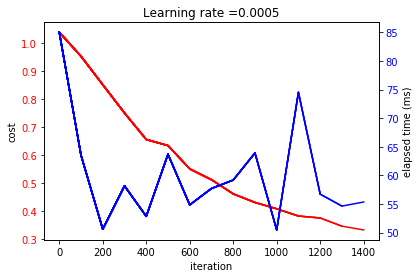

2020-08-25 23:22:15,680 - deep_lib.model_structure - INFO - Cost after iteration 1400: 0.331766 (elapsed time: 55.338ms)
2020-08-25 23:22:21,530 - deep_lib.model_structure - INFO - Model execution finished. Elapsed time 00:01:35


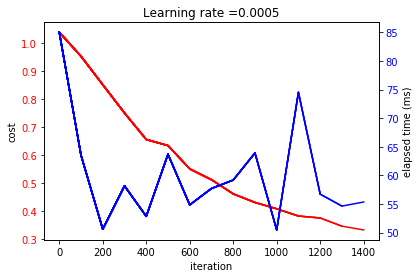

In [8]:
np.random.seed(1)
model = dl.LLayerModel()
parameters, costs = model.execute(train_x, train_y, hyperparameters, save_cost=True)

In [9]:
train_predictions = model.predict(train_x, train_y, parameters)
test_predictions = model.predict(test_x, test_y, parameters)

Accuracy: 0.9904306220095691
Accuracy: 0.8600000000000001


In [10]:
image_widget = wg.interactive(dlu.load_image, url="http://78.media.tumblr.com/tumblr_lnqvm6zb671qi7nl3o1_1280.jpg")

display(image_widget)

interactive(children=(Text(value='http://78.media.tumblr.com/tumblr_lnqvm6zb671qi7nl3o1_1280.jpg', description…

In [19]:
num_px = 64
my_label_y = [1]
image = image_widget.result
print(image.shape)
# print(image)
from PIL import Image
my_image = Image.fromarray(image).resize((num_px,num_px)).resize((num_px*num_px*3,1))
# my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
print(my_image)
my_predicted_image = model.predict(np.array(my_image).flatten(), my_label_y, parameters)



(467, 700, 3)
<PIL.Image.Image image mode=RGB size=12288x1 at 0x7F84B94CA240>


IndexError: tuple index out of range

NameError: name 'my_predicted_image' is not defined

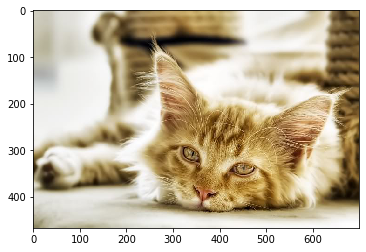

In [21]:
plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [22]:
import math

r  = -4 * np.random.rand()
print(r)
alpha = math.pow(10, r)
print(alpha)

r  = np.random.rand()

beta = 1-10**(- r - 1)
print(beta)

-0.23656522369828403
0.5800090584139931
0.9038792077217048


In [23]:
r1  = -3 * np.random.rand()
r2  = -1 * np.random.rand()
print(r1)
print(r2)
r = r2 - r1
print(r)
beta = 1 - math.pow(10, r)
print(beta)

-0.8584785979311749
-0.6473417764120952
0.21113682151907964
-0.6260609544945026
